In [1]:
import pandas as pd
df = pd.read_csv("empdata.csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [2]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64


In [3]:
print("\nUnique values in Department:", df['Department'].unique())
print("\nUnique values in Attrition:", df['Attrition'].unique())


Unique values in Department: ['Sales' 'HR' 'Engineering' 'Marketing']

Unique values in Attrition: ['No' 'Yes']


In [4]:
numeric_cols=df.select_dtypes(include=['number']).drop(columns=['EmployeeID'])
stats = pd.DataFrame({
    'Mean': numeric_cols.mean(),
    'Median': numeric_cols.median(),
    'Mode': numeric_cols.mode().iloc[0],
    'Standard Deviation': numeric_cols.std(),
    'Variance': numeric_cols.var()
})
fstats = stats.map(lambda x: f"{x:.2f}")
print("Descriptive Statistics\n")
print(fstats)

Descriptive Statistics

                      Mean    Median      Mode Standard Deviation  \
Age                  36.57     35.00     29.00               8.32   
Salary            72820.00  72000.00  68000.00           12643.82   
YearsAtCompany       10.80     10.00      2.00               6.36   
PerformanceScore     84.94     85.50     80.00               6.35   

                      Variance  
Age                      69.20  
Salary            159866262.63  
YearsAtCompany           40.46  
PerformanceScore         40.32  


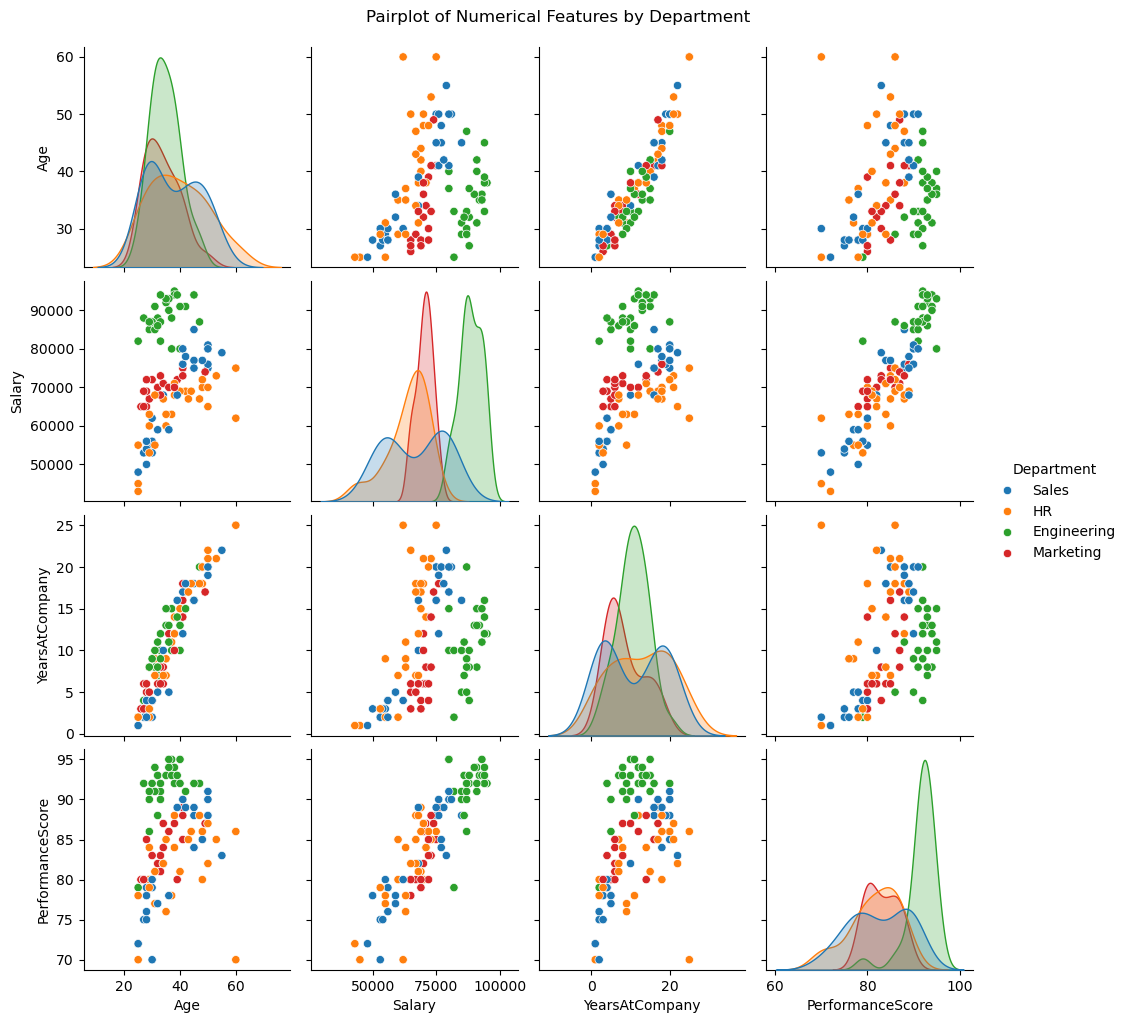

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df.drop(columns=['EmployeeID', 'Name']), hue='Department', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Department', y=1.02)
plt.show()

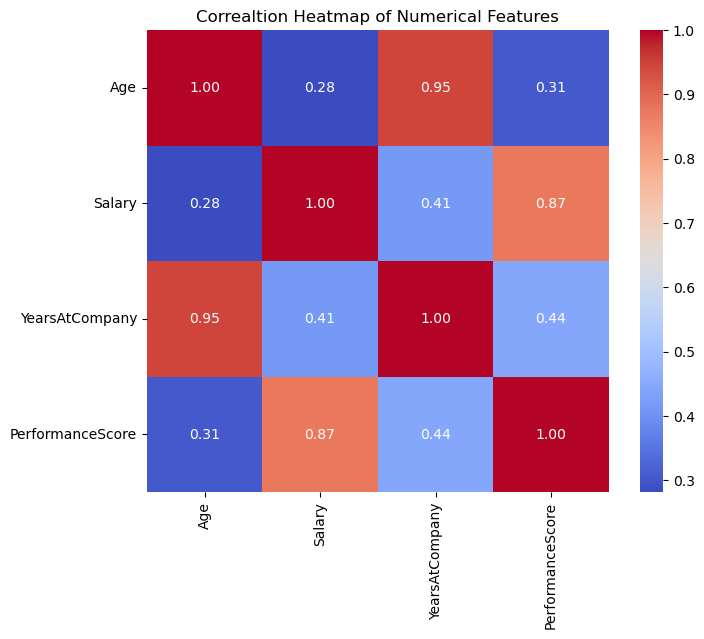

In [6]:
corr = df.drop(columns=['EmployeeID','Name']).select_dtypes(include='number').corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correaltion Heatmap of Numerical Features")
plt.show()

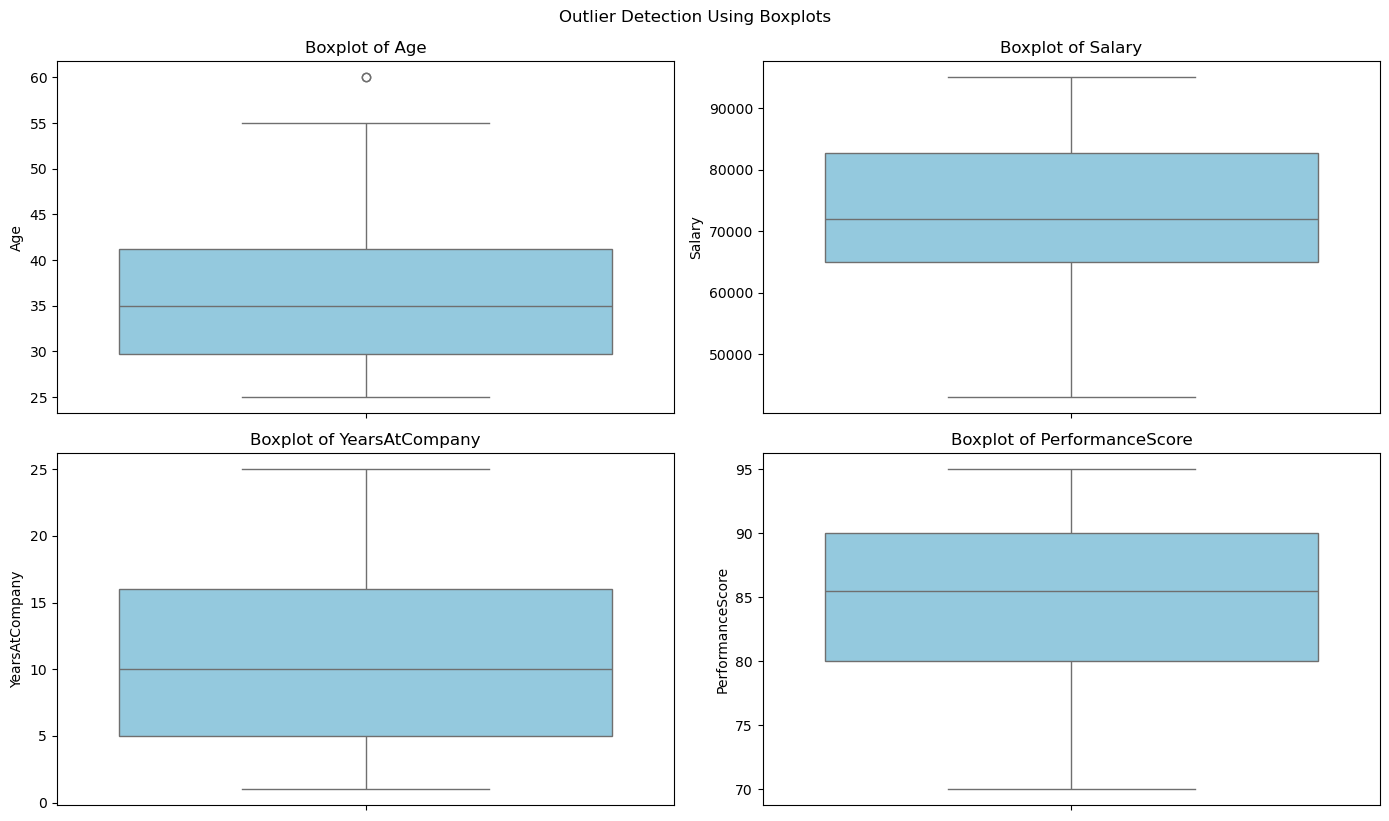

In [7]:
num_cols = df.select_dtypes(include='number').drop(columns='EmployeeID').columns
plt.figure(figsize=(14,8))
for i, col in enumerate(num_cols,1):
    plt.subplot(2, (len(num_cols) + 1) // 2, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.suptitle('Outlier Detection Using Boxplots', y=1.02)
plt.show()

In [44]:
p_attrition = (df['Attrition'] == 'Yes').mean()
print(f"Overall probability of attrition: {p_attrition:.2f}")
p_attrition_dept = df[df['Attrition'] == 'Yes']['Department'].value_counts(normalize=True)
print("\nP(Attrition | Department):")
print(p_attrition_dept)
p_attrition_perf = df[df['Attrition'] == 'Yes']['PerformanceScore'].value_counts(normalize=True)
print("\nP(Attrition | Performance Score):")
print(p_attrition_perf)

Overall probability of attrition: 0.39

P(Attrition | Department):
Department
Sales          0.358974
Engineering    0.307692
HR             0.230769
Marketing      0.102564
Name: proportion, dtype: float64

P(Attrition | Performance Score):
PerformanceScore
93    0.102564
92    0.102564
87    0.076923
85    0.076923
88    0.076923
78    0.076923
89    0.051282
84    0.051282
91    0.051282
86    0.051282
81    0.051282
80    0.025641
94    0.025641
77    0.025641
95    0.025641
70    0.025641
90    0.025641
79    0.025641
83    0.025641
75    0.025641
Name: proportion, dtype: float64


In [45]:
ranges = [(70, 75), (75, 80), (80, 85), (85, 90), (90, 95)]
p_a = (df['Attrition'] == 'Yes').mean()
print("Bayesian Probabilities of Attrition by Performance Score Range:\n")
for low, high in ranges:
    p_b = df[(df['PerformanceScore'] >= low) & (df['PerformanceScore'] < high)].shape[0] / df.shape[0]
    p_b_given_a = df[(df['Attrition'] == 'Yes') & 
                     (df['PerformanceScore'] >= low) & 
                     (df['PerformanceScore'] < high)].shape[0] / (df['Attrition'] == 'Yes').sum()
    if p_b > 0:
        p_a_given_b = (p_b_given_a * p_a) / p_b
        print(f"P(Attrition | Score in [{low}, {high}]): {p_a_given_b:.4f}")
    else:
        print(f"P(Attrition | Score in [{low}, {high}]): Not computable (no data in range)")

Bayesian Probabilities of Attrition by Performance Score Range:

P(Attrition | Score in [70, 75]): 0.2000
P(Attrition | Score in [75, 80]): 0.3750
P(Attrition | Score in [80, 85]): 0.2609
P(Attrition | Score in [85, 90]): 0.4815
P(Attrition | Score in [90, 95]): 0.4615


In [46]:
from scipy.stats import f_oneway
groups = [group['PerformanceScore'].values for name, group in df.groupby('Department')]
f_stat, p_value = f_oneway(*groups)
print("ANOVA Results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis — Performance score differs across departments.")
else:
    print("Fail to reject the null hypothesis — No significant difference in performance score across departments.")

ANOVA Results:
F-statistic: 25.78
P-value: 2.5591493445552222e-12
Reject the null hypothesis — Performance score differs across departments.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
df['Years_Per_Score'] = df['YearsAtCompany'] / df['PerformanceScore']
df['Salary_Per_Year'] = df['Salary'] / (df['YearsAtCompany'] + 1)
scaler = MinMaxScaler()
df[['Salary_scaled', 'Performance_scaled', 'Years_Per_Score', 'Salary_Per_Year']] = scaler.fit_transform( df[['Salary', 'PerformanceScore', 'Years_Per_Score', 'Salary_Per_Year']])
le_attrition = LabelEncoder()
le_dept = LabelEncoder()
df['Attrition_encoded'] = le_attrition.fit_transform(df['Attrition'])
df['Department_encoded'] = le_dept.fit_transform(df['Department'])             
features = ['Salary_scaled', 'Performance_scaled', 'Department_encoded', 'Years_Per_Score', 'Salary_Per_Year']
target = 'Attrition_encoded'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5, 
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_sm, y_train_sm)
y_pred = rf_model.predict(X_test)
print("Random Forest Evaluation")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall   : {recall_score(y_test, y_pred):.2f}")
print(f"F1-score : {f1_score(y_test, y_pred):.2f}")

Random Forest Evaluation
Accuracy : 0.80
Precision: 0.83
Recall   : 0.62
F1-score : 0.71


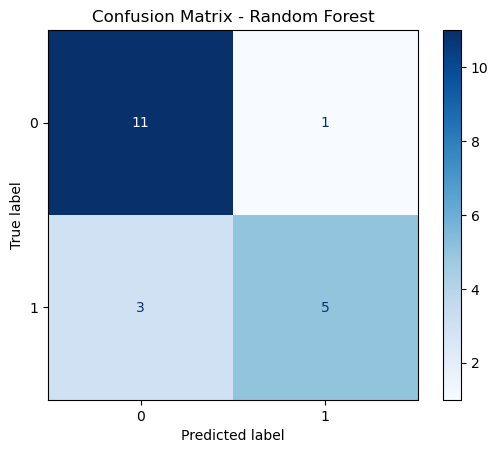

In [48]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

=== Linear Regression Evaluation ===
R² Score : 0.77
MSE      : 11.60


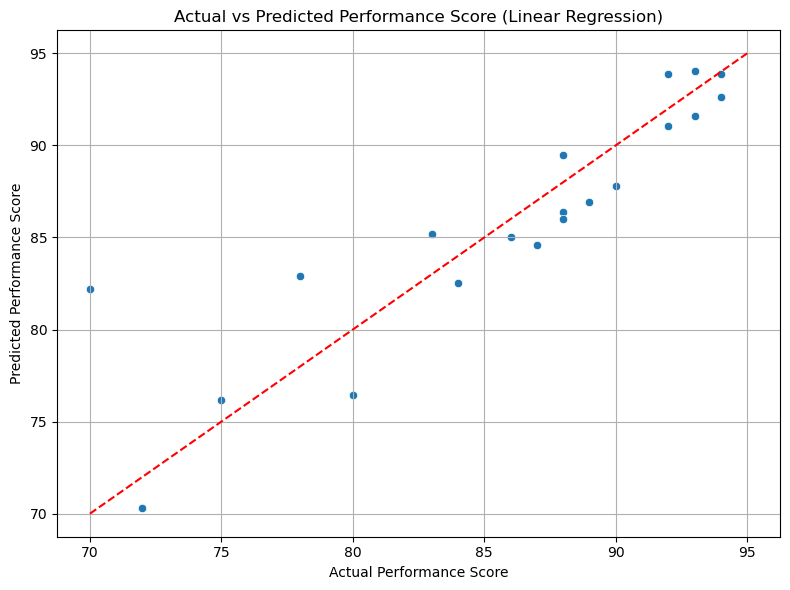

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Salary_scaled', 'Department_encoded', 'YearsAtCompany', 'Salary_Per_Year']
target = 'PerformanceScore'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("=== Linear Regression Evaluation ===")
print(f"R² Score : {r2:.2f}")
print(f"MSE      : {mse:.2f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance Score (Linear Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Diagonal reference line
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/300


c:\Users\Rishav\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7012.0688 - mae: 83.5162 - val_loss: 7419.2397 - val_mae: 85.9416
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6979.6006 - mae: 83.3598 - val_loss: 7311.3462 - val_mae: 85.3144
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6798.2041 - mae: 82.2567 - val_loss: 7155.0488 - val_mae: 84.3968
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6742.9551 - mae: 81.9071 - val_loss: 6919.7661 - val_mae: 82.9959
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6344.4116 - mae: 79.4347 - val_loss: 6568.0156 - val_mae: 80.8538
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6367.1855 - mae: 79.5434 - val_loss: 6067.0693 - val_mae: 77.7001
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5529.8667 - mae: 74.1232 - val_loss: 5375.1816 - val_mae: 73.1093
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4949.5605 - mae: 70.0551 - val_loss: 4489.5840 - val_mae: 66.7564
Epoch 9/300

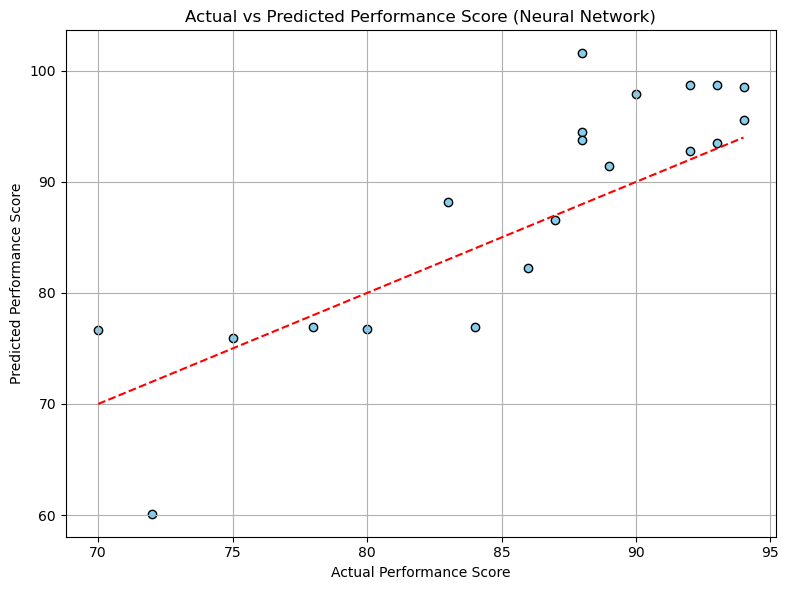

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['Department'] = le.fit_transform(df_encoded['Department'])
features = ['Age', 'Salary', 'YearsAtCompany', 'Department']
target = 'PerformanceScore'
scaler = MinMaxScaler()
df_encoded[features] = scaler.fit_transform(df_encoded[features])
X = df_encoded[features].values
y = df_encoded[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = model.fit(X_train, y_train,validation_split=0.2,epochs=300,batch_size=4,verbose=1,callbacks=[early_stop])
loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n=== Evaluation Metrics ===")
print(f"Test MSE : {mse:.2f}")
print(f"Test MAE : {mae:.2f}")
print(f"Test R²  : {r2:.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance Score (Neural Network)")
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/200


c:\Users\Rishav\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3764 - loss: 0.7161 - val_accuracy: 0.7500 - val_loss: 0.6849
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5495 - loss: 0.6915 - val_accuracy: 0.6875 - val_loss: 0.6770
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6797 - loss: 0.6773 - val_accuracy: 0.6875 - val_loss: 0.6692
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5581 - loss: 0.6900 - val_accuracy: 0.6875 - val_loss: 0.6609
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5603 - loss: 0.6880 - val_accuracy: 0.6875 - val_loss: 0.6499
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5908 - loss: 0.6791 - val_accuracy: 0.6875 - val_loss: 0.6438
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6851 - loss: 0.6535 - val_accuracy: 0.6875 - val_loss: 0.6367
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6123 - loss: 0.6755 - val_accuracy: 0.6875 - val_loss: 0.

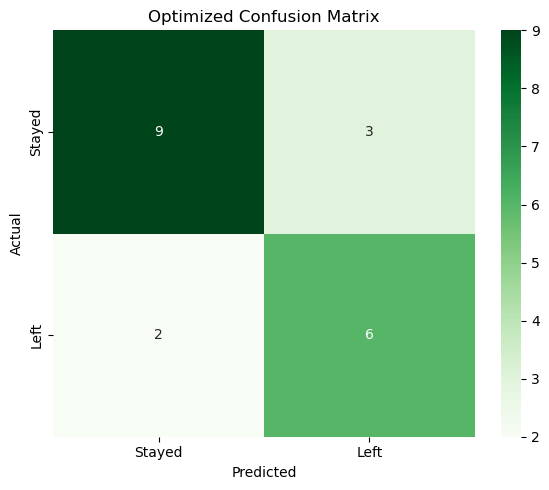

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
df_model = df.copy()
le_attr = LabelEncoder()
le_dept = LabelEncoder()
df_model['Attrition'] = le_attr.fit_transform(df_model['Attrition'])  
df_model['Department'] = le_dept.fit_transform(df_model['Department'])
features = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore', 'Department']
target = 'Attrition'
scaler = MinMaxScaler()
df_model[features] = scaler.fit_transform(df_model[features])
X = df_model[features].values
y = df_model[target].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=4,
    callbacks=[early_stop],
    verbose=1
)
y_pred_prob = model.predict(X_test).flatten()
best_acc = 0
best_thresh = 0.5
for thresh in np.arange(0.3, 0.7, 0.01):
    y_pred_thresh = (y_pred_prob > thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    if acc > best_acc:
        best_acc = acc
        best_thresh = thresh
y_pred_final = (y_pred_prob > best_thresh).astype(int)
print(f"\n Best Threshold: {best_thresh:.2f} | Accuracy: {best_acc:.2f}")
print("\nClassification Report")
print(classification_report(y_test, y_pred_final, target_names=['Stayed', 'Left']))
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Stayed', 'Left'],
            yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Optimized Confusion Matrix')
plt.tight_layout()
plt.show()

In [57]:
import plotly.express as px
import pandas as pd
import plotly.express as px
import pandas as pd
trend_df = df.groupby('YearsAtCompany')['PerformanceScore'].mean().reset_index()
trend_df = trend_df.sort_values('YearsAtCompany')
fig = px.line(
    trend_df,
    x='YearsAtCompany',
    y='PerformanceScore',
    title='Average Performance Score by Years at Company',
    markers=True
)
fig.update_traces(line=dict(color='royalblue', width=3), marker=dict(size=8))
fig.update_layout(xaxis_title='Years at Company', yaxis_title='Average Performance Score')
fig.show()
attrition_counts = df.groupby(['Department', 'Attrition']).size().reset_index(name='Count')
fig2 = px.bar(
    attrition_counts,
    x='Department',
    y='Count',
    color='Attrition',
    barmode='group',
    title='Department-wise Attrition',
    text='Count'
)
fig2.show()
fig3 = px.scatter(
    df,
    x='Salary',
    y='PerformanceScore',
    color='Department',
    size='YearsAtCompany',
    hover_data=['Age', 'Attrition'],
    title='Salary vs. Performance Score (by Department)'
)
fig3.show()